In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls "/content/drive/My Drive"

 2111B747-B05F-46FC-B033-A2AE18F50DAB.MOV
'BAO CAO NCKH.pdf'
'Bộ chấp hành điện 2'
'Chapter 04-Supply and Demand.pdf'
'Chính trị-xã hội'
 Classroom
'Cơ học'
'Colab Notebooks'
 ĐAMH
'Điện-Điện tử'
 Duy
 Fundamentals-of-Modern-Manufacturing-4th-Edition-by-Mikell-P-Groover.pdf
 IMG_0190.JPG
'KEYWIN(BANQUYEN).txt'
'Phan tu dan huong 2'
 sachcu-dangban
'Untitled Diagram.drawio'


In [0]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib import rc
import matplotlib.ticker as ticker
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection
from sklearn.svm import SVC
%matplotlib inline

In [0]:
pd.options.display.float_format = '{:.5f}'.format

In [0]:
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/2008.csv")

In [6]:
data.shape

(7009728, 29)

In [0]:
pd.set_option('display.max_columns', 500,'display.max_rows', 500)

In [8]:
data.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [9]:
(data.isnull().sum()/len(data))*100

Year                 0.00000
Month                0.00000
DayofMonth           0.00000
DayOfWeek            0.00000
DepTime              1.94367
CRSDepTime           0.00000
ArrTime              2.16341
CRSArrTime           0.00000
UniqueCarrier        0.00000
FlightNum            0.00000
TailNum              1.18928
ActualElapsedTime    2.20692
CRSElapsedTime       0.01204
AirTime              2.20692
ArrDelay             2.20692
DepDelay             1.94367
Origin               0.00000
Dest                 0.00000
Distance             0.00000
TaxiIn               2.16341
TaxiOut              1.95525
Cancelled            0.00000
CancellationCode    98.03938
Diverted             0.00000
CarrierDelay        78.24830
WeatherDelay        78.24830
NASDelay            78.24830
SecurityDelay       78.24830
LateAircraftDelay   78.24830
dtype: float64

In [0]:
data=data.drop(columns=['CancellationCode','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','Year','Cancelled','Diverted',])

In [11]:
obj=data.select_dtypes(['object']).columns

for i in obj:
    print( str(i) + ':'+ str(len(data[i].value_counts())))

UniqueCarrier:20
TailNum:5373
Origin:303
Dest:304


In [0]:
data=data.drop(columns=['TailNum'])

In [0]:
data=data.drop(columns=['DepTime','ArrTime'])

In [0]:
data=data.dropna()

In [15]:
data.isnull().sum()

Month                0
DayofMonth           0
DayOfWeek            0
CRSDepTime           0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
dtype: int64

In [16]:
data.shape

(6855029, 17)

In [17]:
data.head()

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
0,1,3,4,1955,2225,WN,335,128.00000,150.00000,116.00000,-14.00000,8.00000,IAD,TPA,810,4.00000,8.00000
1,1,3,4,735,1000,WN,3231,128.00000,145.00000,113.00000,2.00000,19.00000,IAD,TPA,810,5.00000,10.00000
2,1,3,4,620,750,WN,448,96.00000,90.00000,76.00000,14.00000,8.00000,IND,BWI,515,3.00000,17.00000
3,1,3,4,930,1100,WN,1746,88.00000,90.00000,78.00000,-6.00000,-4.00000,IND,BWI,515,3.00000,7.00000
4,1,3,4,1755,1925,WN,3920,90.00000,90.00000,77.00000,34.00000,34.00000,IND,BWI,515,3.00000,10.00000


In [18]:
data.describe(include="all")

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
count,6855029.00000,6855029.00000,6855029.00000,6855029.00000,6855029.00000,6855029,6855029.00000,6855029.00000,6855029.00000,6855029.00000,6855029.00000,6855029.00000,6855029,6855029,6855029.00000,6855029.00000,6855029.00000
unique,nan,nan,nan,nan,nan,20,nan,nan,nan,nan,nan,nan,303,302,nan,nan,nan
top,nan,nan,nan,nan,nan,WN,nan,nan,nan,nan,nan,nan,ATL,ATL,nan,nan,nan
freq,nan,nan,nan,nan,nan,1186911,nan,nan,nan,nan,nan,nan,407701,406744,nan,nan,nan
mean,6.38852,15.73826,3.92580,1325.03728,1493.71471,NaN,2212.50729,127.32242,129.07781,104.01859,8.16845,9.92384,NaN,NaN,728.74383,6.86015,16.44368
std,3.39883,8.80109,1.98846,464.31295,482.66419,NaN,1956.43672,70.18731,69.53271,67.43980,38.50194,35.20386,NaN,NaN,563.24473,4.93122,11.31062
min,1.00000,1.00000,1.00000,0.00000,0.00000,NaN,1.00000,12.00000,-141.00000,0.00000,-519.00000,-534.00000,NaN,NaN,11.00000,0.00000,0.00000
25%,3.00000,8.00000,2.00000,925.00000,1115.00000,NaN,618.00000,77.00000,80.00000,55.00000,-10.00000,-4.00000,NaN,NaN,326.00000,4.00000,10.00000
50%,6.00000,16.00000,4.00000,1317.00000,1515.00000,NaN,1563.00000,110.00000,111.00000,86.00000,-2.00000,-1.00000,NaN,NaN,581.00000,6.00000,14.00000
75%,9.00000,23.00000,6.00000,1715.00000,1905.00000,NaN,3494.00000,157.00000,159.00000,132.00000,12.00000,8.00000,NaN,NaN,954.00000,8.00000,19.00000


In [0]:
#Delete 5.800.000 rows.
data=data.reset_index()
data=data.drop(columns=['index'])
a=np.arange(6300000)
data=data.drop(a)
data=data.reset_index()
data=data.drop(columns=['index'])

In [0]:
data1 = data

Change CRSArrTime and CRSDepTime to hour categories.

In [0]:
def change_time(x):
  min=x%100;
  hour=(x-min)/100
  res = hour + round(min/60)
  if (res == 24):
    res=0
  return res

In [0]:
data1['CRSDepTime']=data1['CRSDepTime'].apply(change_time)

In [23]:
data1['CRSDepTime']

0        13.00000
1        12.00000
2         8.00000
3         8.00000
4        13.00000
           ...   
555024   10.00000
555025    9.00000
555026    7.00000
555027   13.00000
555028   11.00000
Name: CRSDepTime, Length: 555029, dtype: float64

In [0]:
data1['CRSArrTime']=data1['CRSArrTime'].apply(change_time)

In [25]:
data1['CRSArrTime']

0        14.00000
1        20.00000
2        16.00000
3        12.00000
4        15.00000
           ...   
555024   12.00000
555025   10.00000
555026    9.00000
555027   15.00000
555028   14.00000
Name: CRSArrTime, Length: 555029, dtype: float64

In [26]:
data1.describe(include="all")

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
count,555029.00000,555029.00000,555029.00000,555029.00000,555029.00000,555029,555029.00000,555029.00000,555029.00000,555029.00000,555029.00000,555029.00000,555029,555029,555029.00000,555029.00000,555029.00000
unique,nan,nan,nan,nan,nan,19,nan,nan,nan,nan,nan,nan,281,281,nan,nan,nan
top,nan,nan,nan,nan,nan,WN,nan,nan,nan,nan,nan,nan,ATL,ATL,nan,nan,nan
freq,nan,nan,nan,nan,nan,95048,nan,nan,nan,nan,nan,nan,39114,39128,nan,nan,nan
mean,11.94544,15.42616,3.74707,13.26990,14.83391,NaN,2187.52421,131.72086,132.24984,106.79226,16.01150,16.54049,NaN,NaN,741.90854,7.40898,17.51962
std,0.22712,8.98093,2.01220,4.61486,4.94376,NaN,1944.93869,71.64728,70.69081,68.87144,47.83518,43.89451,NaN,NaN,564.76314,6.09438,12.41567
min,11.00000,1.00000,1.00000,0.00000,0.00000,NaN,1.00000,15.00000,26.00000,6.00000,-90.00000,-49.00000,NaN,NaN,31.00000,1.00000,1.00000
25%,12.00000,8.00000,2.00000,9.00000,11.00000,NaN,658.00000,80.00000,80.00000,57.00000,-8.00000,-4.00000,NaN,NaN,334.00000,4.00000,10.00000
50%,12.00000,15.00000,4.00000,13.00000,15.00000,NaN,1568.00000,114.00000,115.00000,88.00000,2.00000,0.00000,NaN,NaN,590.00000,6.00000,14.00000
75%,12.00000,23.00000,5.00000,17.00000,19.00000,NaN,3016.00000,163.00000,163.00000,136.00000,22.00000,17.00000,NaN,NaN,972.00000,9.00000,20.00000


1 Hot encoding and Min max scaler

In [27]:
obj=['UniqueCarrier', 'Origin', 'Dest','Month','DayofMonth','DayOfWeek','CRSDepTime','CRSArrTime','FlightNum']

for i in obj:
    print( str(i) + ':'+ str(len(data1[i].value_counts())))

UniqueCarrier:19
Origin:281
Dest:281
Month:2
DayofMonth:31
DayOfWeek:7
CRSDepTime:24
CRSArrTime:24
FlightNum:6948


FlightNum > 500. Delete FlightNum.

In [0]:
data1=data1.drop(columns=['FlightNum'])

In [29]:
data1.select_dtypes(['object']).columns

Index(['UniqueCarrier', 'Origin', 'Dest'], dtype='object')

In [0]:
data_1hot=data1

In [0]:
obj=['UniqueCarrier', 'Origin', 'Dest', 'Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime']

for i in obj:
    data_1hot = pd.get_dummies(data_1hot, columns=[i])

In [32]:
data_1hot.describe(include="all")

,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_ABE,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACT,Origin_ACV,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_CMX,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_HTS,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_IPL,Origin_ISP,Origin_ITH,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIR,Origin_PIT,Origin_PMD,Origin_PNS,Origin_PSC,Origin_PSE,Origin_PSG,Origin_PSP,Origin_PVD,Origin_PWM,Origin_RAP,Origin_RDD,Origin_RDM,...,Dest_HLN,Dest_HNL,Dest_HOU,Dest_HPN,Dest_HRL,Dest_HSV,Dest_HTS,Dest_IAD,Dest_IAH,Dest_ICT,Dest_IDA,Dest_ILM,Dest_IND,Dest_IPL,Dest_ISP,Dest_ITH,Dest_ITO,Dest_IYK,Dest_JAC,Dest_JAN,Dest_JAX,Dest_JFK,Dest_JNU,Dest_KOA,Dest_KTN,Dest_LAN,Dest_LAS,Dest_LAW,Dest_LAX,Dest_LBB,Dest_LCH,Dest_LEX,Dest_LFT,Dest_LGA,Dest_LGB,Dest_LIH,Dest_LIT,Dest_LMT,Dest_LNK,Dest_LRD,Dest_LSE,Dest_LWS,Dest_LYH,Dest_MAF,Dest_MBS,Dest_MCI,Dest_MCO,Dest_MDT,Dest_MDW,Dest_MEI,Dest_MEM,Dest_MFE,Dest_MFR,Dest_MGM,Dest_MHT,Dest_MIA,Dest_MKE,Dest_MLB,Dest_MLI,Dest_MLU,Dest_MOB,Dest_MOD,Dest_MOT,Dest_MQT,Dest_MRY,Dest_MSN,Dest_MSO,Dest_MSP,Dest_MSY,Dest_MTJ,Dest_MYR,Dest_OAJ,Dest_OAK,Dest_OGG,Dest_OKC,Dest_OMA,Dest_OME,Dest_ONT,Dest_ORD,Dest_ORF,Dest_OTH,Dest_OTZ,Dest_OXR,Dest_PBI,Dest_PDX,Dest_PFN,Dest_PHF,Dest_PHL,Dest_PHX,Dest_PIA,Dest_PIH,Dest_PIR,Dest_PIT,Dest_PMD,Dest_PNS,Dest_PSC,Dest_PSE,Dest_PSG,Dest_PSP,Dest_PVD,Dest_PWM,Dest_RAP,Dest_RDD,Dest_RDM,Dest_RDU,Dest_RHI,Dest_RIC,Dest_RKS,Dest_RNO,Dest_ROA,Dest_ROC,Dest_ROW,Dest_RST,Dest_RSW,Dest_SAN,Dest_SAT,Dest_SAV,Dest_SBA,Dest_SBN,Dest_SBP,Dest_SCC,Dest_SCE,Dest_SDF,Dest_SEA,Dest_SFO,Dest_SGF,De

**Apply Naïve Bayes Model**

Prepare data_train and data_test.

In [0]:
data_NB_target = pd.DataFrame({'ArrDelay':data_1hot['ArrDelay'], 'DepDelay': data_1hot['DepDelay'], 'Delay':np.arange( len(data_1hot['AirTime']) )})

In [34]:
data_NB_target.head()

,ArrDelay,DepDelay,Delay
0,12.00000,14.00000,0
1,47.00000,65.00000,1
2,-8.00000,7.00000,2
3,12.00000,0.00000,3
4,-8.00000,10.00000,4


In [0]:
data_NB_target = data_NB_target.astype({"ArrDelay":'int64', "DepDelay":'int64', "Delay":'int64'})

In [36]:
data_NB_target.dtypes

ArrDelay    int64
DepDelay    int64
Delay       int64
dtype: object

In [0]:
def consider_delay(x,y):
  if ((x >= 30)or(y >= 30)):
    return 1
  return 0

In [0]:
data_NB_target['Delay'] = data_NB_target.apply(lambda x: consider_delay(x.ArrDelay, x.DepDelay), axis=1)

In [0]:
data_NB_target=data_NB_target.drop(columns=['ArrDelay','DepDelay'])

In [0]:
data_NB_train=data_1hot.drop(columns=['ArrDelay','DepDelay'])

In [41]:
data_NB_target.head()

,Delay
0,0
1,1
2,0
3,0
4,0


In [42]:
data_NB_train.head()

,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_ABE,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACT,Origin_ACV,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_CMX,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_HTS,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_IPL,Origin_ISP,Origin_ITH,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIR,Origin_PIT,Origin_PMD,Origin_PNS,Origin_PSC,Origin_PSE,Origin_PSG,Origin_PSP,Origin_PVD,Origin_PWM,Origin_RAP,Origin_RDD,Origin_RDM,Origin_RDU,Origin_RHI,...,Dest_HLN,Dest_HNL,Dest_HOU,Dest_HPN,Dest_HRL,Dest_HSV,Dest_HTS,Dest_IAD,Dest_IAH,Dest_ICT,Dest_IDA,Dest_ILM,Dest_IND,Dest_IPL,Dest_ISP,Dest_ITH,Dest_ITO,Dest_IYK,Dest_JAC,Dest_JAN,Dest_JAX,Dest_JFK,Dest_JNU,Dest_KOA,Dest_KTN,Dest_LAN,Dest_LAS,Dest_LAW,Dest_LAX,Dest_LBB,Dest_LCH,Dest_LEX,Dest_LFT,Dest_LGA,Dest_LGB,Dest_LIH,Dest_LIT,Dest_LMT,Dest_LNK,Dest_LRD,Dest_LSE,Dest_LWS,Dest_LYH,Dest_MAF,Dest_MBS,Dest_MCI,Dest_MCO,Dest_MDT,Dest_MDW,Dest_MEI,Dest_MEM,Dest_MFE,Dest_MFR,Dest_MGM,Dest_MHT,Dest_MIA,Dest_MKE,Dest_MLB,Dest_MLI,Dest_MLU,Dest_MOB,Dest_MOD,Dest_MOT,Dest_MQT,Dest_MRY,Dest_MSN,Dest_MSO,Dest_MSP,Dest_MSY,Dest_MTJ,Dest_MYR,Dest_OAJ,Dest_OAK,Dest_OGG,Dest_OKC,Dest_OMA,Dest_OME,Dest_ONT,Dest_ORD,Dest_ORF,Dest_OTH,Dest_OTZ,Dest_OXR,Dest_PBI,Dest_PDX,Dest_PFN,Dest_PHF,Dest_PHL,Dest_PHX,Dest_PIA,Dest_PIH,Dest_PIR,Dest_PIT,Dest_PMD,Dest_PNS,Dest_PSC,Dest_PSE,Dest_PSG,Dest_PSP,Dest_PVD,Dest_PWM,Dest_RAP,Dest_RDD,Dest_RDM,Dest_RDU,Dest_RHI,Dest_RIC,Dest_RKS,Dest_RNO,Dest_ROA,Dest_ROC,Dest_ROW,Dest_RST,Dest_RSW,Dest_SAN,Dest_SAT,Dest_SAV,Dest_SBA,Dest_SBN,Dest_SBP,Dest_SCC,Dest_SCE,Dest_SDF,Dest_SEA,Dest_SFO,Dest_SG

Apply Minmaxscaler

In [0]:
scaler = MinMaxScaler(copy=True, feature_range=(0.1, 1))

In [44]:
print(scaler.fit(data_NB_train))

MinMaxScaler(copy=True, feature_range=(0.1, 1))


In [0]:
data_NB_train_mmc=scaler.transform(data_NB_train)


In [0]:
data_NB_train_mmc=pd.DataFrame(data_NB_train_mmc, columns=data_NB_train.columns)

Label Encode

In [47]:
data1

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
0,11,20,4,13.00000,14.00000,CO,60.00000,62.00000,42.00000,12.00000,14.00000,SAT,IAH,191,6.00000,12.00000
1,11,20,4,12.00000,20.00000,CO,277.00000,295.00000,241.00000,47.00000,65.00000,LAS,EWR,2227,18.00000,18.00000
2,11,20,4,8.00000,16.00000,CO,285.00000,300.00000,262.00000,-8.00000,7.00000,SEA,EWR,2401,10.00000,13.00000
3,11,20,4,8.00000,12.00000,CO,394.00000,382.00000,352.00000,12.00000,0.00000,EWR,SEA,2401,6.00000,36.00000
4,11,20,4,13.00000,15.00000,CO,204.00000,222.00000,184.00000,-8.00000,10.00000,SEA,ANC,1449,5.00000,15.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555024,12,13,6,10.00000,12.00000,DL,122.00000,111.00000,71.00000,14.00000,3.00000,ATL,IAD,533,6.00000,45.00000
555025,12,13,6,9.00000,10.00000,DL,167.00000,168.00000,139.00000,-2.00000,-1.00000,ATL,SAT,874,5.00000,23.00000
555026,12,13,6,7.00000,9.00000,DL,121.00000,116.00000,85.00000,0.00000,-5.00000,PBI,ATL,545,24.00000,12.00000
555027,12,13,6,13.00000,15.00000,DL,115.00000,117.00000,89.00000,9.00000,11.00000,IAD,ATL,533,13.00000,13.00000


In [0]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
data_label_enc=data1
# Encode labels in column 'species'. 

obj=data.select_dtypes(['object']).columns

for i in obj:
    data_label_enc[i]= label_encoder.fit_transform(data1[i]) 
  

In [49]:
data_label_enc.drop(columns=['ArrDelay','DepDelay'])

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,Origin,Dest,Distance,TaxiIn,TaxiOut
0,11,20,4,13.00000,14.00000,4,60.00000,62.00000,42.00000,234,127,191,6.00000,12.00000
1,11,20,4,12.00000,20.00000,4,277.00000,295.00000,241.00000,145,89,2227,18.00000,18.00000
2,11,20,4,8.00000,16.00000,4,285.00000,300.00000,262.00000,242,89,2401,10.00000,13.00000
3,11,20,4,8.00000,12.00000,4,394.00000,382.00000,352.00000,89,242,2401,6.00000,36.00000
4,11,20,4,13.00000,15.00000,4,204.00000,222.00000,184.00000,242,13,1449,5.00000,15.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555024,12,13,6,10.00000,12.00000,5,122.00000,111.00000,71.00000,15,126,533,6.00000,45.00000
555025,12,13,6,9.00000,10.00000,5,167.00000,168.00000,139.00000,15,234,874,5.00000,23.00000
555026,12,13,6,7.00000,9.00000,5,121.00000,116.00000,85.00000,202,15,545,24.00000,12.00000
555027,12,13,6,13.00000,15.00000,5,115.00000,117.00000,89.00000,126,15,533,13.00000,13.00000


Apply Naive Baise

Hold out Validation.

In [0]:
data_train, data_test, data_train_target, data_test_target = train_test_split(
...     data_label_enc, data_NB_target, test_size=0.2, random_state=12)

In [51]:
clf_pf = GaussianNB()
clf_pf.partial_fit(data_train, data_train_target, np.unique(data_train_target))
print(clf_pf.score)

NB_predictions_train=clf_pf.predict(data_train)
NB_predictions_test=clf_pf.predict(data_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<bound method ClassifierMixin.score of GaussianNB(priors=None, var_smoothing=1e-09)>


In [52]:
print("Accuracy:",metrics.accuracy_score(data_train_target, NB_predictions_train))
print("Accuracy:",metrics.accuracy_score(data_test_target, NB_predictions_test))

Accuracy: 0.96474957378334
Accuracy: 0.9642001333261265


In [53]:
print(classification_report(data_test_target, NB_predictions_test, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     85891
           1       0.89      0.96      0.92     25115

    accuracy                           0.96    111006
   macro avg       0.94      0.96      0.95    111006
weighted avg       0.97      0.96      0.96    111006



Apply decision tree

Hold out validation

In [0]:
data_train, data_test, data_train_target, data_test_target = train_test_split(
...     data_label_enc, data_NB_target, test_size=0.2, random_state=15)

In [0]:
clf = tree.DecisionTreeClassifier()

In [0]:
clf = clf.fit(data_train, data_train_target)

In [0]:
CT_predictions_test=clf.predict(data_test)

In [0]:
CT_predictions_train=clf.predict(data_train)

In [59]:
print("Accuracy:",metrics.accuracy_score(data_train_target, CT_predictions_train))
print("Accuracy:",metrics.accuracy_score(data_test_target, CT_predictions_test))

Accuracy: 1.0
Accuracy: 1.0


In [60]:
print(classification_report(data_test_target, CT_predictions_test, labels=[0, 1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85998
           1       1.00      1.00      1.00     25008

    accuracy                           1.00    111006
   macro avg       1.00      1.00      1.00    111006
weighted avg       1.00      1.00      1.00    111006



[Text(200.88000000000002, 181.2, 'X[9] <= 29.5\ngini = 0.349\nsamples = 444023\nvalue = [343844, 100179]'),
 Text(133.92000000000002, 108.72, 'X[10] <= 29.5\ngini = 0.053\nsamples = 353454\nvalue = [343844, 9610]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 343844\nvalue = [343844, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 9610\nvalue = [0, 9610]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 90569\nvalue = [0, 90569]')]

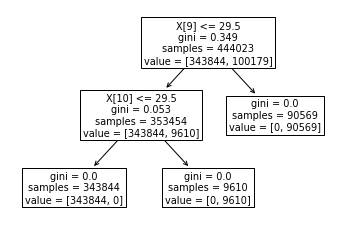

In [61]:
tree.plot_tree(clf.fit(data_train, data_train_target)) 

[Text(200.88000000000002, 181.2, 'X[9] <= 29.5\ngini = 0.349\nsamples = 111006\nvalue = [85998, 25008]'),
 Text(133.92000000000002, 108.72, 'X[10] <= 29.5\ngini = 0.052\nsamples = 88358\nvalue = [85998, 2360]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 85998\nvalue = [85998, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 2360\nvalue = [0, 2360]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 22648\nvalue = [0, 22648]')]

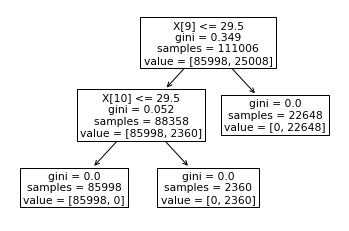

In [62]:
tree.plot_tree(clf.fit(data_test, data_test_target)) 

Apply Logical Rgression.

Hold out validation

In [0]:
data_1hot=data_1hot.drop(columns=['ArrDelay','DepDelay'])

Apply minmaxscaler

In [0]:
scaler = MinMaxScaler(copy=True, feature_range=(0.1, 1))

In [65]:
scaler = MinMaxScaler(feature_range=(0.1, 1))
print(scaler.fit(data_1hot))
data_1hot_minmax=scaler.transform(data_1hot)

MinMaxScaler(copy=True, feature_range=(0.1, 1))


In [0]:
data_train, data_test, data_train_target, data_test_target = train_test_split(
...     data_1hot_minmax, data_NB_target, test_size=0.2, random_state=15)

In [67]:
X=data_train
y=data_train_target
#X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X, y)
LR_predictions_train=clf.predict(data_train)
LR_predictions_test=clf.predict(data_test)
clf.predict_proba(data_train)
clf.score(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8167730050019931

In [68]:
print("Accuracy:",metrics.accuracy_score(data_train_target, LR_predictions_train))
print("Accuracy:",metrics.accuracy_score(data_test_target, LR_predictions_test))

Accuracy: 0.8167730050019931
Accuracy: 0.8170549339675333


In [69]:
print(classification_report(data_test_target, LR_predictions_test, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89     85998
           1       0.70      0.32      0.44     25008

    accuracy                           0.82    111006
   macro avg       0.77      0.64      0.67    111006
weighted avg       0.80      0.82      0.79    111006



Apply Random Forest

In [70]:
data_1hot

,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_ABE,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACT,Origin_ACV,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_CMX,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_HTS,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_IPL,Origin_ISP,Origin_ITH,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIR,Origin_PIT,Origin_PMD,Origin_PNS,Origin_PSC,Origin_PSE,Origin_PSG,Origin_PSP,Origin_PVD,Origin_PWM,Origin_RAP,Origin_RDD,Origin_RDM,Origin_RDU,Origin_RHI,...,Dest_HLN,Dest_HNL,Dest_HOU,Dest_HPN,Dest_HRL,Dest_HSV,Dest_HTS,Dest_IAD,Dest_IAH,Dest_ICT,Dest_IDA,Dest_ILM,Dest_IND,Dest_IPL,Dest_ISP,Dest_ITH,Dest_ITO,Dest_IYK,Dest_JAC,Dest_JAN,Dest_JAX,Dest_JFK,Dest_JNU,Dest_KOA,Dest_KTN,Dest_LAN,Dest_LAS,Dest_LAW,Dest_LAX,Dest_LBB,Dest_LCH,Dest_LEX,Dest_LFT,Dest_LGA,Dest_LGB,Dest_LIH,Dest_LIT,Dest_LMT,Dest_LNK,Dest_LRD,Dest_LSE,Dest_LWS,Dest_LYH,Dest_MAF,Dest_MBS,Dest_MCI,Dest_MCO,Dest_MDT,Dest_MDW,Dest_MEI,Dest_MEM,Dest_MFE,Dest_MFR,Dest_MGM,Dest_MHT,Dest_MIA,Dest_MKE,Dest_MLB,Dest_MLI,Dest_MLU,Dest_MOB,Dest_MOD,Dest_MOT,Dest_MQT,Dest_MRY,Dest_MSN,Dest_MSO,Dest_MSP,Dest_MSY,Dest_MTJ,Dest_MYR,Dest_OAJ,Dest_OAK,Dest_OGG,Dest_OKC,Dest_OMA,Dest_OME,Dest_ONT,Dest_ORD,Dest_ORF,Dest_OTH,Dest_OTZ,Dest_OXR,Dest_PBI,Dest_PDX,Dest_PFN,Dest_PHF,Dest_PHL,Dest_PHX,Dest_PIA,Dest_PIH,Dest_PIR,Dest_PIT,Dest_PMD,Dest_PNS,Dest_PSC,Dest_PSE,Dest_PSG,Dest_PSP,Dest_PVD,Dest_PWM,Dest_RAP,Dest_RDD,Dest_RDM,Dest_RDU,Dest_RHI,Dest_RIC,Dest_RKS,Dest_RNO,Dest_ROA,Dest_ROC,Dest_ROW,Dest_RST,Dest_RSW,Dest_SAN,Dest_SAT,Dest_SAV,Dest_SBA,Dest_SBN,Dest_SBP,Dest_SCC,Dest_SCE,Dest_SDF,Dest_SEA,Dest_SFO,Dest_SG

In [0]:
data_train, data_test, data_train_target, data_test_target = train_test_split(
...     data_1hot_minmax, data_NB_target, test_size=0.2, random_state=15)

In [78]:
# random forest model creation
clf = RandomForestClassifier()
clf.fit(data_train,data_train_target) 
RF_predictions_train=clf.predict(data_train)
RF_predictions_test=clf.predict(data_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [79]:
print("Accuracy:",metrics.accuracy_score(data_train_target, RF_predictions_train))
print("Accuracy:",metrics.accuracy_score(data_test_target, RF_predictions_test))

Accuracy: 0.9834377948890035
Accuracy: 0.8245860584112571


In [80]:
print(classification_report(data_test_target, RF_predictions_test, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89     85998
           1       0.74      0.34      0.47     25008

    accuracy                           0.82    111006
   macro avg       0.79      0.65      0.68    111006
weighted avg       0.81      0.82      0.80    111006



Apply Gradient Boosting

In [0]:
data_train, data_test, data_train_target, data_test_target = train_test_split(
...     data_1hot_minmax, data_NB_target, test_size=0.2, random_state=20)

In [76]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
X_train = data_train
X_val = data_test
y_train = data_train_target
y_val = data_test_target
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    GB_predictions_test=gb_clf.predict(X_val)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))
    print(classification_report(data_test_target, GB_predictions_test, labels=[0, 1]))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate:  0.05
Accuracy score (training): 0.775
Accuracy score (validation): 0.774
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     85898
           1       0.00      0.00      0.00     25108

    accuracy                           0.77    111006
   macro avg       0.39      0.50      0.44    111006
weighted avg       0.60      0.77      0.68    111006



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate:  0.075
Accuracy score (training): 0.775
Accuracy score (validation): 0.774
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     85898
           1       0.00      0.00      0.00     25108

    accuracy                           0.77    111006
   macro avg       0.39      0.50      0.44    111006
weighted avg       0.60      0.77      0.68    111006



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate:  0.1
Accuracy score (training): 0.775
Accuracy score (validation): 0.774
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     85898
           1       0.00      0.00      0.00     25108

    accuracy                           0.77    111006
   macro avg       0.39      0.50      0.44    111006
weighted avg       0.60      0.77      0.68    111006



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate:  0.25
Accuracy score (training): 0.775
Accuracy score (validation): 0.774
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     85898
           1       0.85      0.00      0.00     25108

    accuracy                           0.77    111006
   macro avg       0.81      0.50      0.44    111006
weighted avg       0.79      0.77      0.68    111006



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate:  0.5
Accuracy score (training): 0.791
Accuracy score (validation): 0.792
              precision    recall  f1-score   support

           0       0.79      0.99      0.88     85898
           1       0.79      0.11      0.19     25108

    accuracy                           0.79    111006
   macro avg       0.79      0.55      0.53    111006
weighted avg       0.79      0.79      0.72    111006



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate:  0.75
Accuracy score (training): 0.794
Accuracy score (validation): 0.795
              precision    recall  f1-score   support

           0       0.80      0.98      0.88     85898
           1       0.73      0.14      0.24     25108

    accuracy                           0.79    111006
   macro avg       0.76      0.56      0.56    111006
weighted avg       0.78      0.79      0.74    111006



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate:  1
Accuracy score (training): 0.794
Accuracy score (validation): 0.795
              precision    recall  f1-score   support

           0       0.80      0.98      0.88     85898
           1       0.69      0.17      0.27     25108

    accuracy                           0.79    111006
   macro avg       0.74      0.57      0.58    111006
weighted avg       0.78      0.79      0.74    111006



Apply SVN

In [0]:
data_train, data_test, data_train_target, data_test_target = train_test_split(
...     data_1hot_minmax, data_NB_target, test_size=0.2, random_state=30)

In [0]:
X_train=data_train
y_train=data_train_target
X_test=data_test
y_test=data_test_target
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

print(classification_report(y_test,y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
